In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

df = pd.read_csv('Residual_Analysis_Data.csv')
df


,x,y1,y2,y3,y4,y5
0,1,4.600887,6.079108,5.466778,1.000000,10.405390
1,2,5.413366,11.572745,31.118867,2.987810,15.504220
2,3,5.215160,16.585907,33.102697,4.914978,15.929692
3,4,6.623644,19.011471,51.817408,7.857833,14.882990
4,5,5.880258,22.658983,55.665075,9.807141,15.960976
5,6,6.110946,31.751843,60.723009,11.991494,22.582277
6,7,5.760375,33.994606,63.469433,18.914654,22.861964
7,8,6.763769,33.650308,75.543378,24.677964,25.229324
8,9,6.476712,35.554853,84.359966,28.941334,19.433415
9,10,6.708776,34.493439,84.605977,28.625429,35.782519


## (a) 线性回归

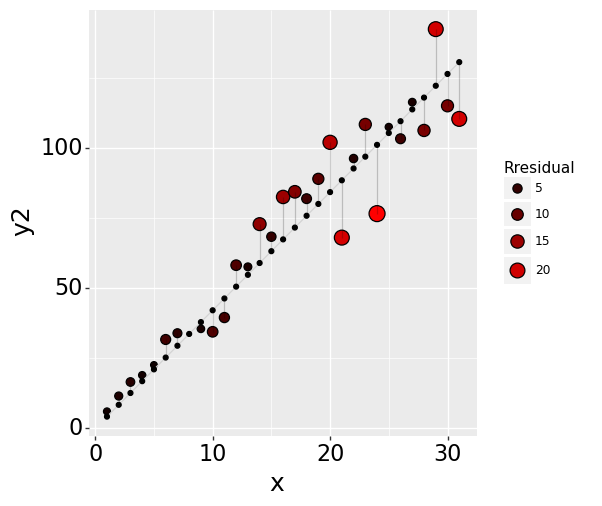

<ggplot: (135861421469)>


In [2]:
results = sm.OLS(df.y2, df.x).fit()

df['predicted'] = results.predict()   # 保存预测值
df['residuals'] = df.predicted-df.y2  # 保存残差(有正有负)
df['Abs_Residuals'] = np.abs(df.residuals)  # 保存残差的绝对值
# mydata包含x、y2、predicted、residuals、Abs_Residuals 共5列数值
base_Residuals = (ggplot(df, aes(x='x', y='y2')) +
                  geom_point(aes(fill='Abs_Residuals', size='Abs_Residuals'), shape='o', colour="black") +
                  # 使用实际值绘制气泡图，并将气泡的颜色和面积映射到残差的绝对值Abs_Residuals
                  # 添加空心圆圈的预测值
                  geom_line(aes(y='predicted'), color="lightgrey") +
                  geom_point(aes(y='predicted'), shape='o') +  # 添加空心圆圈的预测值
                  # 添加实际值和预测值的连接线...
                  geom_segment(aes(xend='x', yend='predicted'), alpha=.2) +

                  # 填充颜色映射到red单色渐变系
                  scale_fill_gradientn(colors=["black", "red"]) +

                  guides(fill=guide_legend(title="Rresidual"),
                         size=guide_legend(title="Rresidual")) +
                  theme(
    axis_title=element_text(size=18, face="plain", color="black"),
    axis_text=element_text(size=16, face="plain", color="black"),
    # legend_position="none",
    aspect_ratio=1.1,
    figure_size=(5, 5),
    dpi=100)
)
print(base_Residuals)


## (b)二次回归

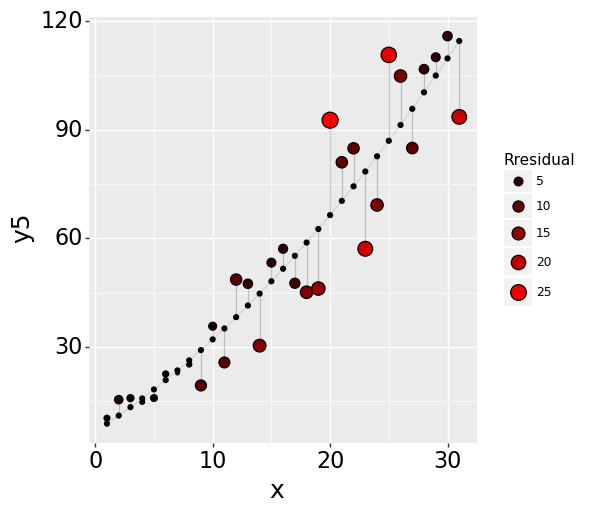

<ggplot: (135861539335)>


In [3]:
X = np.column_stack((df.x, df.x**2))
# 使用 sm.add_constant() 在 array 上加入一列常项 1。
X = sm.add_constant(X)
results = sm.OLS(df.y5, X).fit()

df['predicted'] = results.predict()   # 保存预测值
df['residuals'] = df.predicted-df.y5  # 保存残差(有正有负)
df['Abs_Residuals'] = np.abs(df.residuals)  # 保存残差的绝对值
# mydata包含x、y2、predicted、residuals、Abs_Residuals 共5列数值
base_Residuals = (ggplot(df, aes(x='x', y='y5')) +
                  geom_point(aes(fill='Abs_Residuals', size='Abs_Residuals'), shape='o', colour="black") +
                  # 使用实际值绘制气泡图，并将气泡的颜色和面积映射到残差的绝对值Abs_Residuals
                  # geom_smooth(method = "lm", se = False, color = "lightgrey") + # 添加灰色的线性拟合曲线
                  # 添加空心圆圈的预测值
                  geom_line(aes(y='predicted'), color="lightgrey") +
                  geom_point(aes(y='predicted'), shape='o') +  # 添加空心圆圈的预测值
                  # 添加实际值和预测值的连接线...
                  geom_segment(aes(xend='x', yend='predicted'), alpha=.2) +

                  # 填充颜色映射到red单色渐变系
                  scale_fill_gradientn(colors=["black", "red"]) +

                  guides(fill=guide_legend(title="Rresidual"),
                         size=guide_legend(title="Rresidual")) +
                  theme(
    axis_title=element_text(size=18, face="plain", color="black"),
    axis_text=element_text(size=16, face="plain", color="black"),
    # legend_position="none",
    aspect_ratio=1.1,
    figure_size=(5, 5),
    dpi=100)
)
print(base_Residuals)
